In [4]:
import numpy as np 
import copy 
import matplotlib.pyplot as plt 
import h5py 
import scipy 
from PIL import Image 
from scipy import ndimage 
from lr_utils import load_dataset 
from public_tests import *
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#loading the data 
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### dataset (image) preprocessing 
 ###### data pre-processing steps
* figure out the dimensions and shapes of the problem, training and testins sets 
* reshape teh datasets 
* standarize the data 


y= [0]non-cat


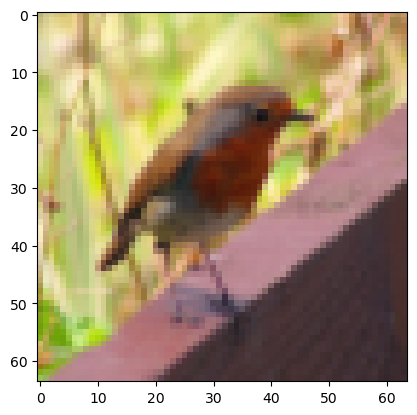

In [6]:
#ploting an image from the dataset 
index = 10
plt.imshow(train_set_x_orig[index])
print ("y= "+str (train_set_y[: , index])+ classes[np.squeeze(train_set_y[: , index])].decode("utf-8"))

In [7]:
m_train= train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]
print ( m_train , m_test, num_px)
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

209 50 64
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [8]:
#Reshaping the training set 
train_set_x_flatten = train_set_x_orig.reshape (train_set_x_orig.shape[0], -1).T
test_set_x_flatten= test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


#### data standarization 
standarize data is to center it by substracting the mean of the whole numpy array from each example, and then devide each example by the stadard deviation of the whole numpy array

for picture datasets, it is simpler, we devide every row of the dataset by 255 which is the max value of a pixel channel 

In [9]:
train_set_x= train_set_x_flatten/255
test_set_x = test_set_x_flatten /255

<a name='3'></a>
## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$



<a name='4'></a>
## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

<a name='4-1'></a>
### 4.1 - Helper functions

<a name='ex-3'></a>
### sigmoid
 $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ 

In [10]:
#graded function: segmoid 
def sigmoid(z): 
    s = 1/ (1+ np.exp(-z))
    return s 

In [11]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
All tests passed!


In [12]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


<a name='4-2'></a>
### 4.2 - Initializing parameters

<a name='ex-4'></a>
- initialize_with_zeros


In [26]:
#graded function : initialize_with_zeros
def initialize_with_zeros(dim):
    w= np.zeros((dim, 1))
    b=0
    return w, b

In [27]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)


AssertionError: 